# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Data was collected from 17 Campaigns that occurred betwene May 2008 to November 2010. A total of 79354 contacts were used in these campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [8]:
# Import necessary libraries for data analysis, preprocessing, model training, and evaluation.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
import time
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [9]:
# Load the bank marketing dataset into a pandas DataFrame.
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [10]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [12]:
# Count and handle NA values
na_counts = bank.isna().sum()
na_counts_filtered = na_counts[na_counts > 0]
na_counts_filtered

Series([], dtype: int64)

In [13]:
# Count values for understanding different types of values
print(bank['job'].value_counts())
print(bank['marital'].value_counts())
print(bank['education'].value_counts())
print(bank['contact'].value_counts())
print(bank['contact'].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: int64


In [14]:
# Calculating the count of "unknown" values in each column
unknown_counts = bank.apply(lambda x: (x == 'unknown').sum())


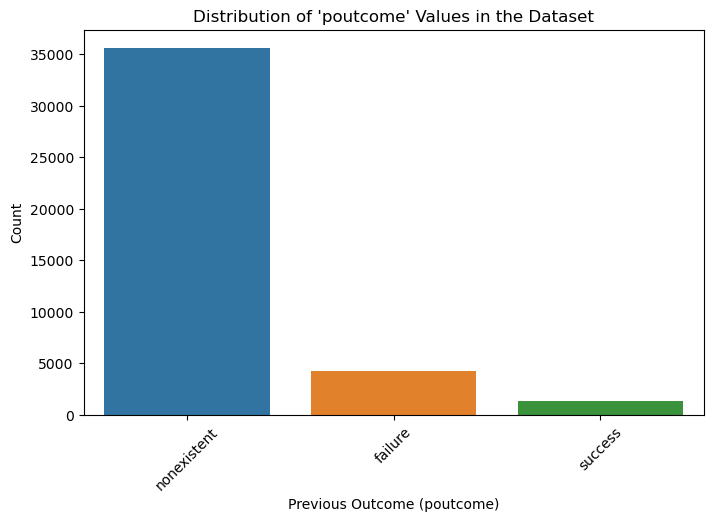

In [15]:
# Distribution of poutcome

plt.figure(figsize=(8, 5))
sns.countplot(data=bank, x='poutcome', order=bank['poutcome'].value_counts().index)


plt.title("Distribution of 'poutcome' Values in the Dataset")
plt.xlabel("Previous Outcome (poutcome)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

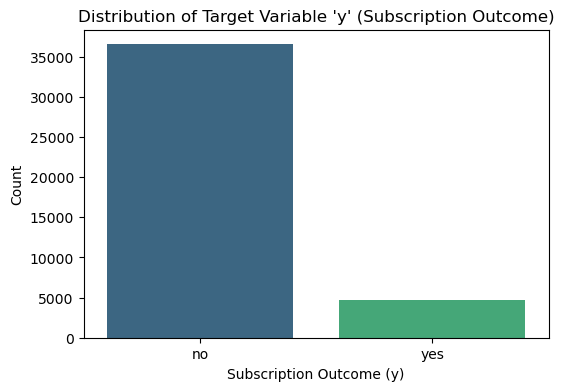

In [16]:
# Distribution of Target Variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(data=bank, x='y', palette="viridis")
plt.title("Distribution of Target Variable 'y' (Subscription Outcome)")
plt.xlabel("Subscription Outcome (y)")
plt.ylabel("Count")
plt.show()

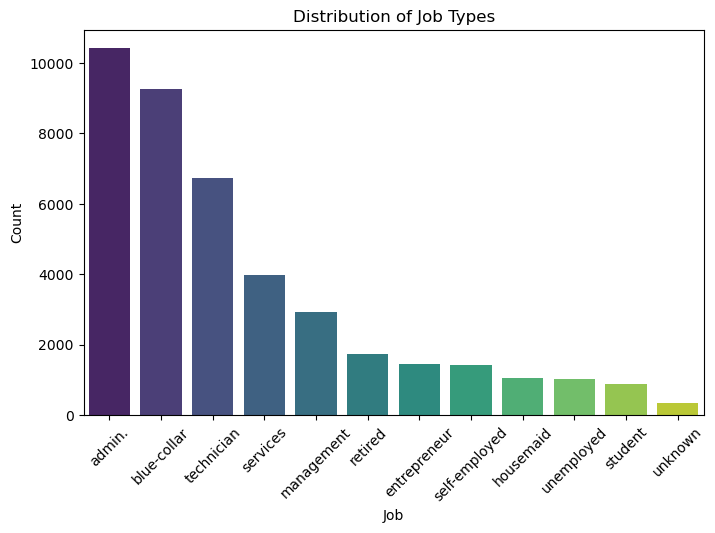

In [17]:
# Plotting the Distribution of 'job' as a separate count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=bank, x='job', order=bank['job'].value_counts().index, palette="viridis")
plt.title("Distribution of Job Types")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

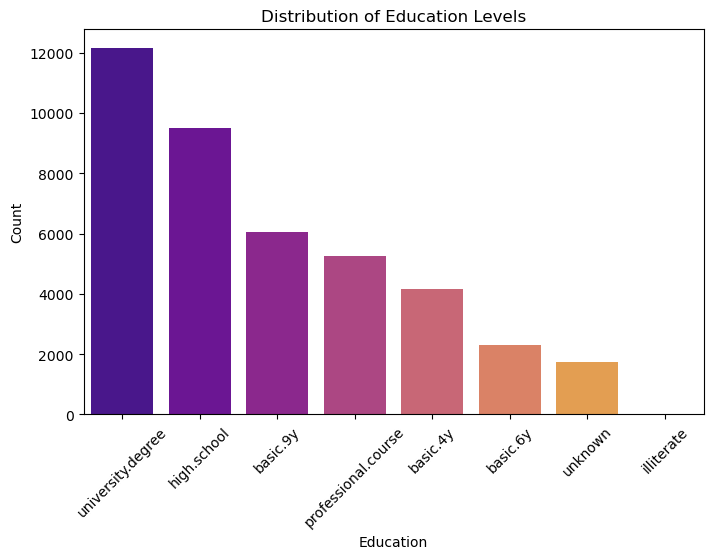

In [18]:
# Plotting the Distribution of 'education' as a count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=bank, x='education', order=bank['education'].value_counts().index, palette="plasma")
plt.title("Distribution of Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

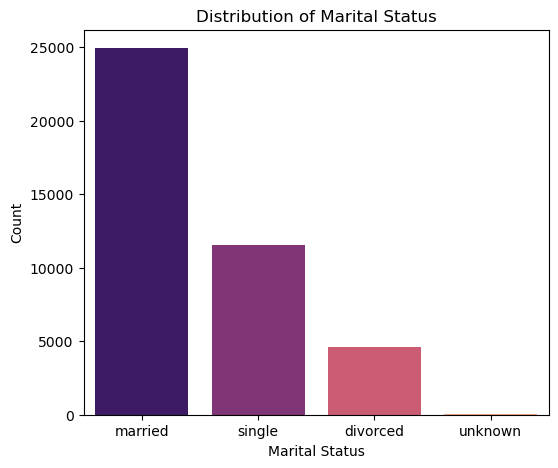

In [19]:
# Plotting the Distribution of marital column as a count plot
plt.figure(figsize=(6, 5))
sns.countplot(data=bank, x='marital', order=bank['marital'].value_counts().index, palette="magma")
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

C:\Users\usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


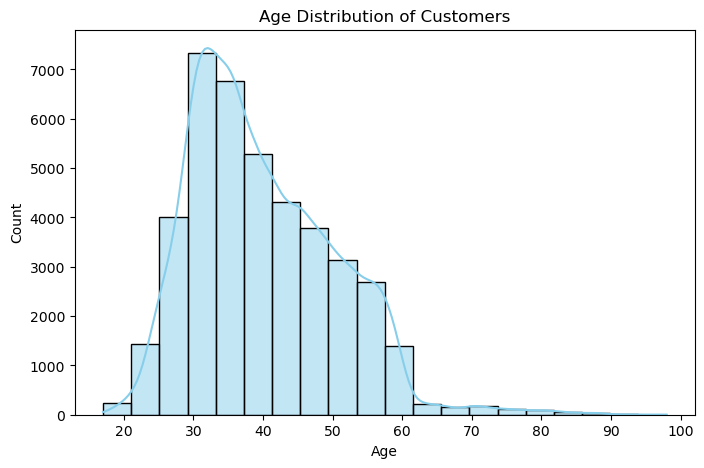

In [20]:
# Age Distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(bank['age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

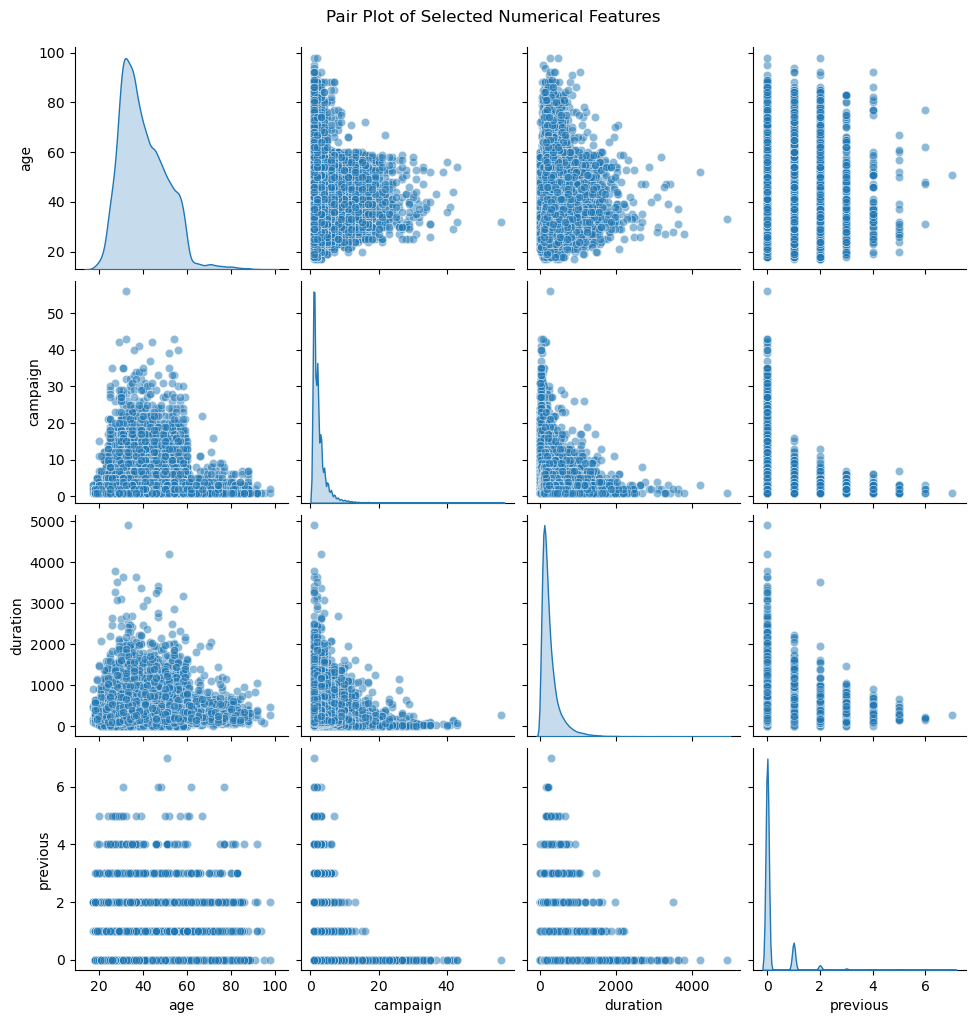

In [21]:
# Pair Plot of Numerical Features
num_features = ['age', 'campaign', 'duration', 'previous']
sns.pairplot(bank[num_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02)
plt.show()

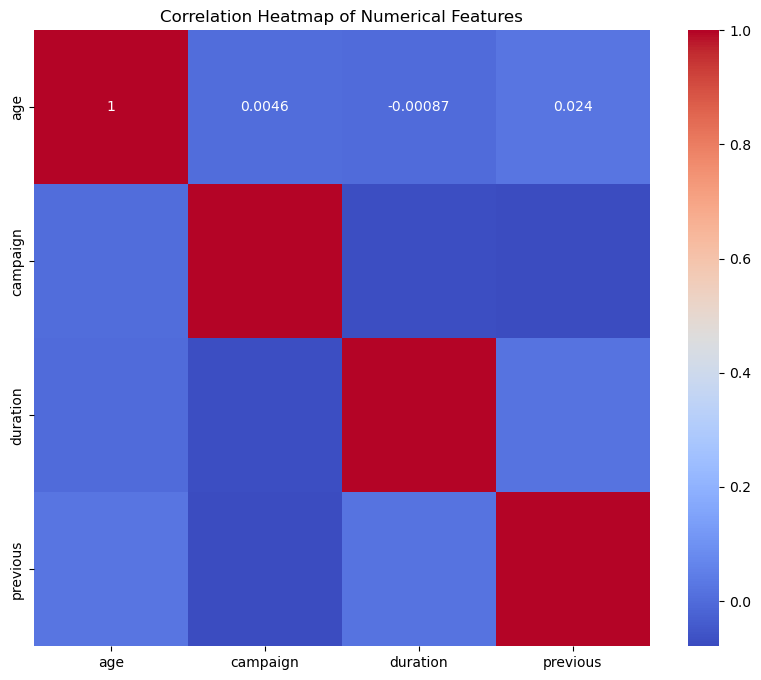

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = bank[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


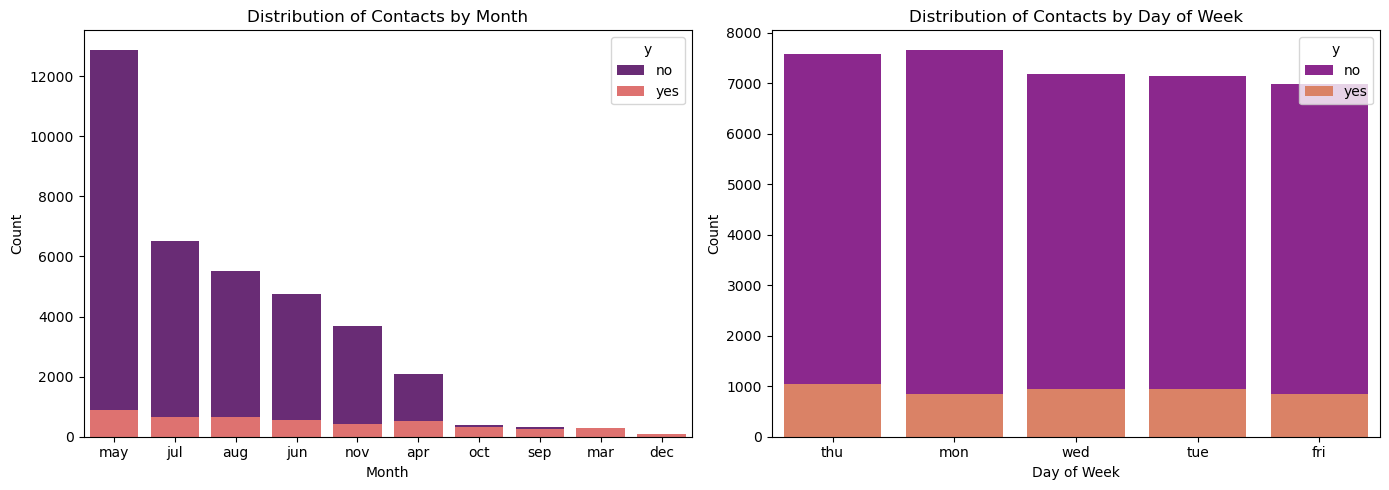

In [23]:
#  Month and Day of Week Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart for Month distribution
sns.countplot(data=bank, x='month', hue='y', ax=axes[0], palette="magma", order=bank['month'].value_counts().index, dodge=False)
axes[0].set_title("Distribution of Contacts by Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Count")

# Stacked bar chart for Day of Week distribution
sns.countplot(data=bank, x='day_of_week', hue='y', ax=axes[1], palette="plasma", order=bank['day_of_week'].value_counts().index, dodge=False)
axes[1].set_title("Distribution of Contacts by Day of Week")
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

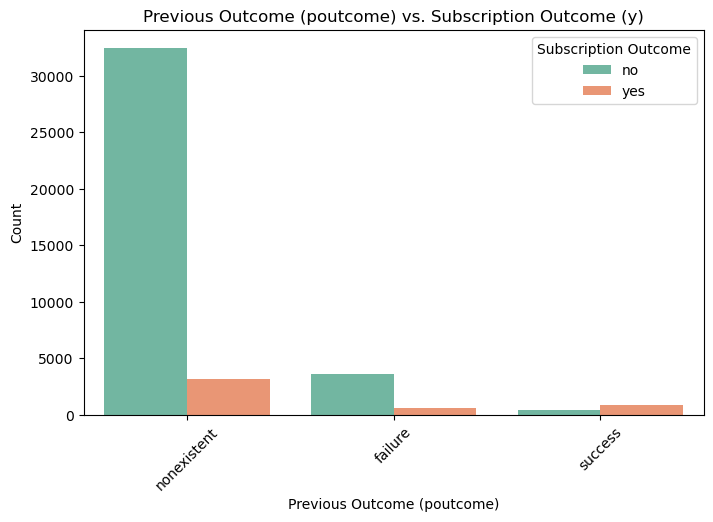

In [24]:
# 8. Poutcome vs Target Variable 'y'
plt.figure(figsize=(8, 5))
sns.countplot(data=bank, x='poutcome', hue='y', palette="Set2")
plt.title("Previous Outcome (poutcome) vs. Subscription Outcome (y)")
plt.xlabel("Previous Outcome (poutcome)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Subscription Outcome")
plt.show()

C:\Users\usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


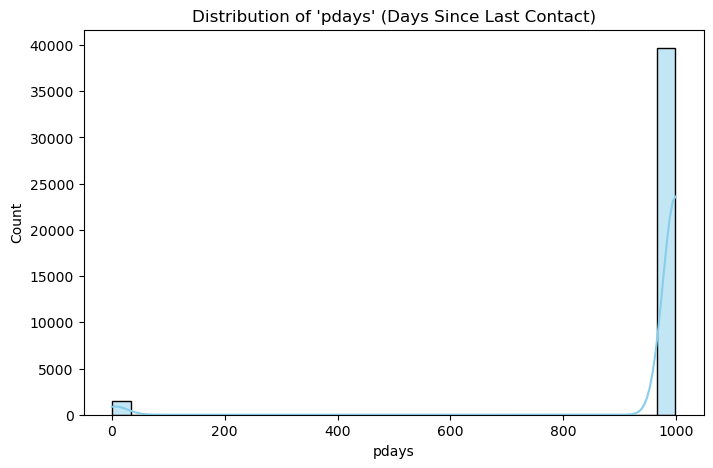

In [25]:
# Plotting the distribution of 'pdays' to understand its values better
plt.figure(figsize=(8, 5))
sns.histplot(bank['pdays'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of 'pdays' (Days Since Last Contact)")
plt.xlabel("pdays")
plt.ylabel("Count")
plt.show()

C:\Users\usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


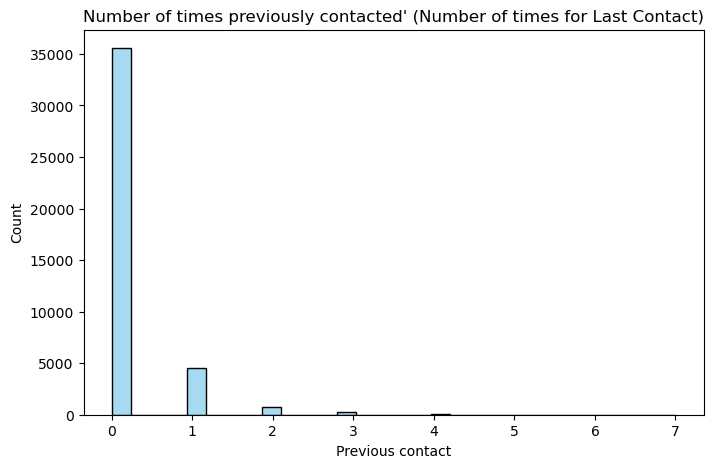

In [26]:
# Plotting the distribution of 'previous' to understand its values better
plt.figure(figsize=(8, 5))
sns.histplot(bank['previous'], bins=30, color='skyblue')
plt.title("Number of times previously contacted' (Number of times for Last Contact)")
plt.xlabel("Previous contact")
plt.ylabel("Count")
plt.show()

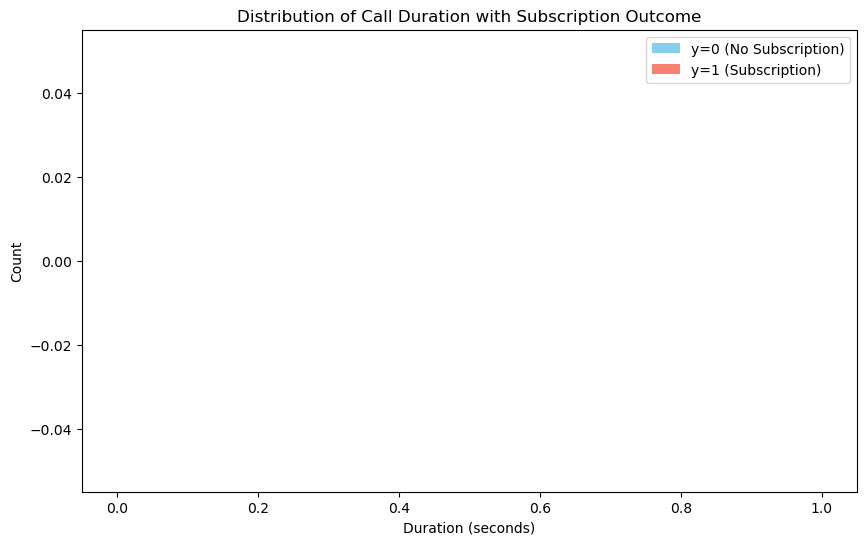

In [27]:
# Stacked histogram of 'duration' with 'y' 
plt.figure(figsize=(10, 6))


duration_y0 = bank[bank['y'] == 0]['duration']
duration_y1 = bank[bank['y'] == 1]['duration']


plt.hist([duration_y0, duration_y1], bins=30, stacked=True, label=['y=0 (No Subscription)', 'y=1 (Subscription)'], color=['skyblue', 'salmon'])
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Call Duration with Subscription Outcome')
plt.legend()
plt.show()

In [28]:
# Preprocess the data by removing unnecessary columns and cleaning up string values.

bank = bank.drop(columns=['poutcome'])
bank = bank.drop(columns=['pdays'])
bank = bank.drop(columns=['previous'])

bank['job'] = bank['job'].str.replace(' ', '_')

bank['marital'] = bank['marital'].str.replace('.', '_')

bank['education'] = bank['education'].str.replace('[. ]', '_')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [30]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  emp.var.rate    41188 non-null  float64
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  euribor3m       41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  y               41188 non-null 

# Business Objective

Develop a predictive model that can identify customers who are more likely to subscribe to a term deposit (target variable y). The goal is to increase campaign conversion rates by focusing efforts on customers with a high probability of subscribing, thereby optimizing resources and reducing costs.

The business objective of this task is to predict whether a client will subscribe to a term deposit (the target variable y) based on various demographic, financial, and campaign-related features. This prediction will help the bank optimize its marketing campaigns by identifying potential customers who are more likely to respond positively to a term deposit offer. The goal is to improve the efficiency of marketing strategies, reduce costs, and increase the conversion rate of successful subscriptions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [34]:
# Convert categorical features to numerical representations using mappings.

month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
bank['month'] = bank['month'].map(month_mapping)

day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
bank['day_of_week'] = bank['day_of_week'].map(day_mapping)

default_mapping = {'yes': 1, 'no': 0, 'unknown': 9}
bank['default'] = bank['default'].map(default_mapping)

housing_mapping = {'yes': 1, 'no': 0, 'unknown': 9}
bank['housing'] = bank['housing'].map(housing_mapping)

loan_mapping = {'yes': 1, 'no': 0, 'unknown': 9}
bank['loan'] = bank['loan'].map(loan_mapping)

y_mapping = {'yes': 1, 'no': 0, 'unknown': 9}
bank['y'] = bank['y'].map(y_mapping)



In [35]:
# Separate features (predictors) and target variable from the dataset.

features = bank[['age', 'marital', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']]

target = bank['y']

In [36]:
# Define the transformer for OneHotEncoding specific columns and leaving others as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['marital', 'job', 'education', 'contact'])  
    ],
    remainder='passthrough'  
)
# Encode categorical features using OneHotEncoder and create a new DataFrame with encoded features.

features_encoded = preprocessor.fit_transform(features)


encoded_column_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(['marital', 'job', 'education', 'contact'])
all_feature_names = list(encoded_column_names) + ['age', 'default', 'housing', 'loan', 'month', 'day_of_week']


features_encoded_df = pd.DataFrame(features_encoded, columns=all_feature_names)


print(features_encoded_df.head())

   marital_married  marital_single  marital_unknown  job_blue-collar  \
0              1.0             0.0              0.0              0.0   
1              1.0             0.0              0.0              0.0   
2              1.0             0.0              0.0              0.0   
3              1.0             0.0              0.0              0.0   
4              1.0             0.0              0.0              0.0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0               0.0            1.0             0.0          0.0   
1               0.0            0.0             0.0          0.0   
2               0.0            0.0             0.0          0.0   
3               0.0            0.0             0.0          0.0   
4               0.0            0.0             0.0          0.0   

   job_self-employed  job_services  ...  education_professional.course  \
0                0.0           0.0  ...                            0.0   
1               

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [38]:
# Split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(features_encoded_df, target, test_size=0.3, random_state=42)



### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [40]:
# Calculate and print the baseline accuracy based on the class distribution.

target_counts = target.value_counts(normalize=True)  
baseline_accuracy = target_counts.max()  

print("Class Distribution:", target_counts)
print("Baseline Accuracy:", baseline_accuracy)

Class Distribution: y
0    0.887346
1    0.112654
Name: proportion, dtype: float64
Baseline Accuracy: 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [42]:
# Perform Grid Search to find the best hyperparameters for Logistic Regression model and predict on the test set.

param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'class_weight': ['balanced', None]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'class_weight': ['balanced', None]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'class_weight': ['balanced', None], 'l1_ratio': [0.5]}
]

logistic_model = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')

grid_search.fit(X_train, y_train)

best_logistic_model = grid_search.best_estimator_

y_pred_best = best_logistic_model.predict(X_test)



### Problem 9: Score the Model

What is the accuracy of your model?

In [44]:
# Evaluate the best model's performance
best_accuracy = accuracy_score(y_test, y_pred_best)
best_conf_matrix = confusion_matrix(y_test, y_pred_best)
best_class_report = classification_report(y_test, y_pred_best, zero_division=1)

print("Best Accuracy:", best_accuracy)
print("\nConfusion Matrix:\n", best_conf_matrix)
print("\nClassification Report:\n", best_class_report)

Best Accuracy: 0.8875940762320952

Confusion Matrix:
 [[10968     0]
 [ 1389     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       1.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.94      0.50      0.47     12357
weighted avg       0.90      0.89      0.83     12357



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [46]:
# Initializing models with default settings
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)

In [47]:
# Train and evaluate multiple models, storing their performance metrics in a dictionary.

model_performance = {
    "Model": [],
    "Train Time (s)": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}


models = [("Logistic Regression", logistic_model), 
          ("K-Nearest Neighbors", knn_model), 
          ("Decision Tree", decision_tree_model), 
          ("SVM", svm_model)]


for model_name, model in models:
    start_time = time.time()                  
    model.fit(X_train, y_train)               
    train_time = time.time() - start_time     
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))  
    test_accuracy = accuracy_score(y_test, model.predict(X_test))     
    
  
    model_performance["Model"].append(model_name)
    model_performance["Train Time (s)"].append(train_time)
    model_performance["Train Accuracy"].append(train_accuracy)
    model_performance["Test Accuracy"].append(test_accuracy)

In [48]:
# Converting the results to a DataFrame and displaying
performance_df = pd.DataFrame(model_performance)


print(performance_df)

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression        0.879631        0.887239       0.887594
1  K-Nearest Neighbors        0.003506        0.902223       0.883305
2        Decision Tree        0.080052        0.979605       0.832888
3                  SVM        5.553101        0.887239       0.887594


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# Logistic Regression Tuning

In [51]:
# Hyperparameter tuning for Logistic Regression using GridSearchCV to find the best parameters and evaluate the model.

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],                 
    'penalty': ['l1', 'l2', 'elasticnet'],        
    'solver': ['saga'],                           
    'class_weight': ['balanced', None],           
    'l1_ratio': [0.5]                             
}


lr_model = LogisticRegression(random_state=42, max_iter=1000)


grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)


grid_search_lr.fit(X_train, y_train)


best_lr_params = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_


y_pred_lr_best = best_lr_model.predict(X_test)


best_lr_accuracy = accuracy_score(y_test, y_pred_lr_best)


print("Best Logistic Regression Parameters:", best_lr_params)
print("Best Logistic Regression Test Accuracy:", best_lr_accuracy)

C:\Users\usman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best Logistic Regression Parameters: {'C': 0.01, 'class_weight': None, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression Test Accuracy: 0.8875940762320952


# Adjusted performance LR

In [53]:
# Train and evaluate the final Logistic Regression model with the best hyperparameters obtained from GridSearchCV.

best_params = {
    'C': 0.01,
    'class_weight': None,
    'l1_ratio': 0.5,
    'penalty': 'l1',
    'solver': 'saga'
}


best_lr_model = LogisticRegression(**best_params, random_state=42, max_iter=1000)


start_time = time.time()
best_lr_model.fit(X_train, y_train)
training_time_lr = time.time() - start_time


y_pred_best_lr = best_lr_model.predict(X_test)


final_best_lr_accuracy = accuracy_score(y_test, y_pred_best_lr)


print("Final Best Logistic Regression Test Accuracy:", final_best_lr_accuracy)
print("Training Time (s):", training_time_lr)

C:\Users\usman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Final Best Logistic Regression Test Accuracy: 0.8875940762320952
Training Time (s): 3.102076530456543


# KNN tuning

In [55]:
# Hyperparameter tuning for KNN using GridSearchCV to find the best parameters and evaluate the model.
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],           # Range of neighbors to test
    'weights': ['uniform', 'distance'],         # Weighting options
    'metric': ['euclidean', 'manhattan']        # Distance metrics to test
}

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV for KNN with 5-fold cross-validation
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_knn.fit(X_train, y_train)

# Extract the best parameters and the best KNN model
best_knn_params = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

# Make predictions using the best KNN model
y_pred_knn_best = best_knn_model.predict(X_test)

# Calculate the accuracy of the best KNN model
best_knn_accuracy = accuracy_score(y_test, y_pred_knn_best)

# Display results
print("Best KNN Parameters:", best_knn_params)
print("Best KNN Test Accuracy:", best_knn_accuracy)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best KNN Test Accuracy: 0.8875131504410455


# Adjusted performance KNN

In [57]:
# Train and evaluate the final KNN model with the best hyperparameters obtained from GridSearchCV.

best_knn_params = {
    'metric': 'manhattan',
    'n_neighbors': 11,
    'weights': 'uniform'
}

# Initialize KNN with the best parameters
best_knn_model = KNeighborsClassifier(**best_knn_params)

# Fit the model to the training data
start_time = time.time()
best_knn_model.fit(X_train, y_train)
training_time_knn = time.time() - start_time

# Make predictions on the test set
y_pred_best_knn = best_knn_model.predict(X_test)

# Calculate the accuracy of the model with the best parameters
final_best_knn_accuracy = accuracy_score(y_test, y_pred_best_knn)

# Display the accuracy
print("Final Best KNN Test Accuracy:", final_best_knn_accuracy)
print("Training Time (s):", training_time_knn)

Final Best KNN Test Accuracy: 0.8875131504410455
Training Time (s): 0.003502368927001953


# Decision Tree tuning

In [59]:
# Hyperparameter tuning for Decision Tree using GridSearchCV to find the best parameters and evaluate the model.

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],                 # Range of depths to test
    'min_samples_split': [2, 5, 10, 15],                # Min samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10],                  # Min samples required at a leaf node
    'criterion': ['gini', 'entropy'],                   # Splitting criterion
    'max_features': [None, 'sqrt', 'log2']              # Features considered for best split
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV for Decision Tree with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

# Extract the best parameters and the best Decision Tree model
best_dt_params = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Make predictions using the best Decision Tree model
y_pred_dt_best = best_dt_model.predict(X_test)

# Calculate the accuracy of the best Decision Tree model
best_dt_accuracy = accuracy_score(y_test, y_pred_dt_best)

# Display results
print("Best Decision Tree Parameters:", best_dt_params)
print("Best Decision Tree Test Accuracy:", best_dt_accuracy)

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Decision Tree Test Accuracy: 0.8875940762320952


# Adjusted performance Decision Tree

In [61]:
# Train and evaluate the final Decision Tree model with the best hyperparameters obtained from GridSearchCV.

best_dt_params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'max_features': 'log2',
    'min_samples_leaf': 10,
    'min_samples_split': 2
}

# Initialize Decision Tree with the best parameters
best_dt_model = DecisionTreeClassifier(**best_dt_params, random_state=42)

# Fit the model to the training data
start_time = time.time()
best_dt_model.fit(X_train, y_train)
training_time_dt = time.time() - start_time

# Make predictions on the test set
y_pred_best_dt = best_dt_model.predict(X_test)

# Calculate the accuracy of the model with the best parameters
final_best_dt_accuracy = accuracy_score(y_test, y_pred_best_dt)

# Display the accuracy
print("Final Best Decision Tree Test Accuracy:", final_best_dt_accuracy)
print("Training Time (s):", training_time_dt)

Final Best Decision Tree Test Accuracy: 0.8875940762320952
Training Time (s): 0.010007381439208984


# SVM tuning

In [63]:
# Hyperparameter tuning for SVM using GridSearchCV to find the best parameters and evaluate the model.

param_distributions_svm = {
    'C': [0.1, 1, 10],                   # Fewer regularization values
    'kernel': ['linear', 'rbf'],         # Only the most common kernels
    'gamma': ['scale', 'auto']           # Key gamma settings for non-linear kernels
}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Set up RandomizedSearchCV with fewer combinations and 3-fold cross-validation
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_distributions_svm,
                                       n_iter=10, scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_svm.fit(X_train, y_train)

# Extract the best parameters and the best SVM model
best_svm_params = random_search_svm.best_params_
best_svm_model = random_search_svm.best_estimator_

# Make predictions using the best SVM model
y_pred_svm_best = best_svm_model.predict(X_test)

# Calculate the accuracy of the best SVM model
best_svm_accuracy = accuracy_score(y_test, y_pred_svm_best)

# Display results
print("Best SVM Parameters:", best_svm_params)
print("Best SVM Test Accuracy:", best_svm_accuracy)

Best SVM Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best SVM Test Accuracy: 0.8875940762320952


# Adjusted Performance SVM

In [65]:
# Train and evaluate the final SVM model with the best hyperparameters obtained from GridSearchCV.

best_svm_params = {
    'kernel': 'rbf',
    'gamma': 'scale',
    'C': 10
}

# Initialize SVM with the best parameters
best_svm_model = SVC(**best_svm_params, random_state=42)

# Fit the model to the training data
start_time = time.time()
best_svm_model.fit(X_train, y_train)
training_time_svm = time.time() - start_time

# Make predictions on the test set
y_pred_best_svm = best_svm_model.predict(X_test)

# Calculate the accuracy of the model with the best parameters
final_best_svm_accuracy = accuracy_score(y_test, y_pred_best_svm)

# Display the accuracy
print("Final Best SVM Test Accuracy:", final_best_svm_accuracy)
print("Training Time (s):", training_time_svm)

Final Best SVM Test Accuracy: 0.8875940762320952
Training Time (s): 20.308171033859253


In [66]:
# Creating a dictionary to store the final performance of each model and adding it to a dataframe for ploting and display
model_performance = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "SVM"],
    "Test Accuracy": [final_best_lr_accuracy, final_best_knn_accuracy, final_best_dt_accuracy, final_best_svm_accuracy],
    "Training Time (s)": [training_time_lr, training_time_knn, training_time_dt, training_time_svm]
}

performance_df = pd.DataFrame(model_performance)




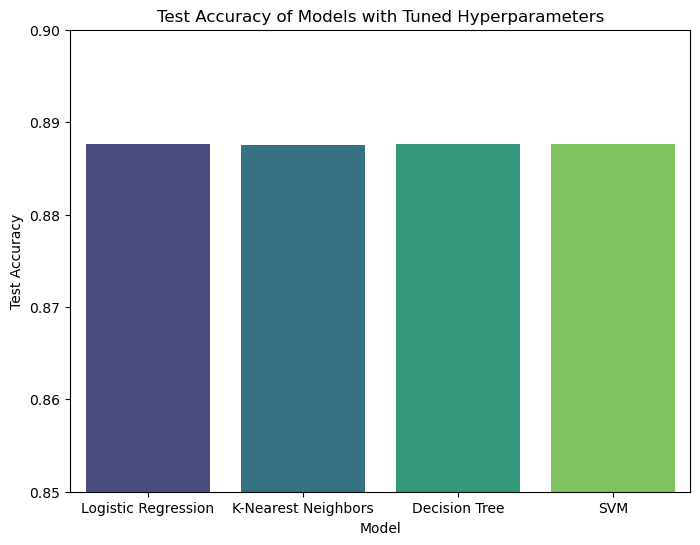

In [67]:
# Bar Plot of Test Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Test Accuracy', data=performance_df, palette='viridis')
plt.title("Test Accuracy of Models with Tuned Hyperparameters")
plt.ylim(0.85, 0.9)
plt.ylabel("Test Accuracy")
plt.show()


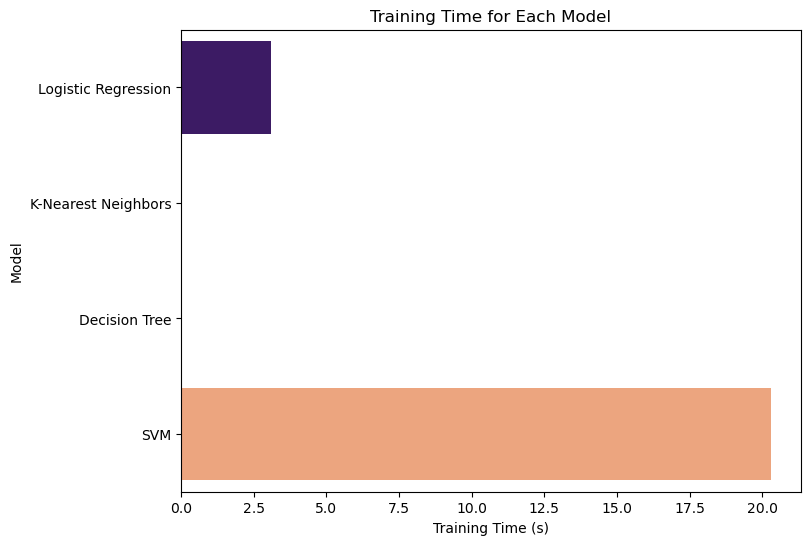

In [68]:
# Horizontal Bar Plot for Training Time
plt.figure(figsize=(8, 6))
sns.barplot(x='Training Time (s)', y='Model', data=performance_df, palette='magma')
plt.title("Training Time for Each Model")
plt.xlabel("Training Time (s)")
plt.ylabel("Model")
plt.show()

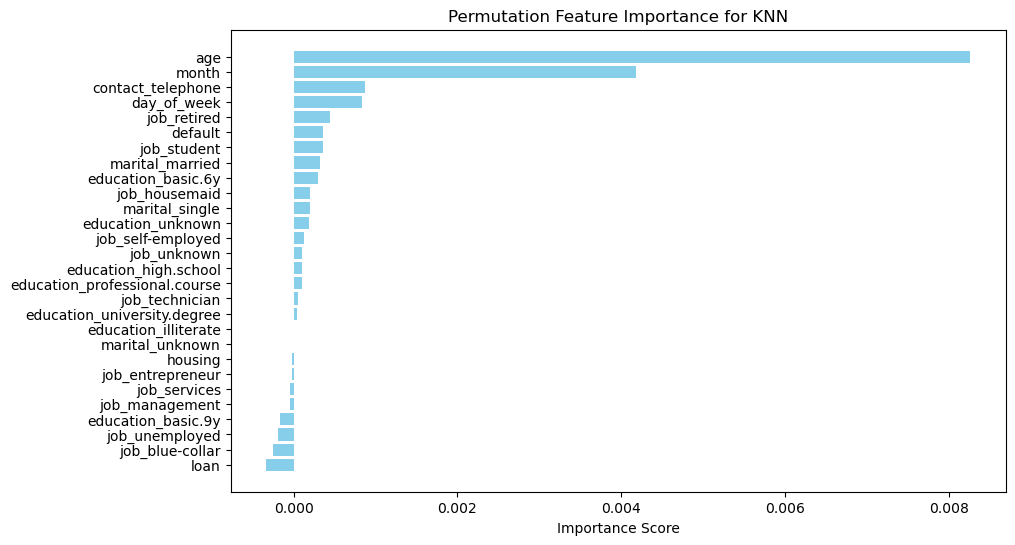

,Feature,Importance
22,age,0.008263
26,month,0.004176
21,contact_telephone,0.000874
27,day_of_week,0.000834
7,job_retired,0.000445
23,default,0.000356
10,job_student,0.000356
0,marital_married,0.000316
14,education_basic.6y,0.000299
5,job_housemaid,0.000194


In [69]:
# Assuming best_knn_model is your trained KNN model
# Running permutation importance on the KNN model
perm_importance = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Extracting importance scores and feature names
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Permutation Feature Importance for KNN")
plt.gca().invert_yaxis()
plt.show()

# Displaying the importance values
importance_df

In [70]:
model_metrics = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "SVM"],
    "Accuracy": [],
    "Recall": [],
    "F1 Score": [],
    "Confusion Matrix": []
}

# Logistic Regression metrics
lr_conf_matrix = confusion_matrix(y_test, y_pred_best_lr)
lr_accuracy = accuracy_score(y_test, y_pred_best_lr)
lr_recall = recall_score(y_test, y_pred_best_lr)
lr_f1 = f1_score(y_test, y_pred_best_lr)
model_metrics["Accuracy"].append(lr_accuracy)
model_metrics["Recall"].append(lr_recall)
model_metrics["F1 Score"].append(lr_f1)
model_metrics["Confusion Matrix"].append(lr_conf_matrix)

# K-Nearest Neighbors metrics
knn_conf_matrix = confusion_matrix(y_test, y_pred_best_knn)
knn_accuracy = accuracy_score(y_test, y_pred_best_knn)
knn_recall = recall_score(y_test, y_pred_best_knn)
knn_f1 = f1_score(y_test, y_pred_best_knn)
model_metrics["Accuracy"].append(knn_accuracy)
model_metrics["Recall"].append(knn_recall)
model_metrics["F1 Score"].append(knn_f1)
model_metrics["Confusion Matrix"].append(knn_conf_matrix)

# Decision Tree metrics
dt_conf_matrix = confusion_matrix(y_test, y_pred_best_dt)
dt_accuracy = accuracy_score(y_test, y_pred_best_dt)
dt_recall = recall_score(y_test, y_pred_best_dt)
dt_f1 = f1_score(y_test, y_pred_best_dt)
model_metrics["Accuracy"].append(dt_accuracy)
model_metrics["Recall"].append(dt_recall)
model_metrics["F1 Score"].append(dt_f1)
model_metrics["Confusion Matrix"].append(dt_conf_matrix)

# SVM metrics
svm_conf_matrix = confusion_matrix(y_test, y_pred_best_svm)
svm_accuracy = accuracy_score(y_test, y_pred_best_svm)
svm_recall = recall_score(y_test, y_pred_best_svm)
svm_f1 = f1_score(y_test, y_pred_best_svm)
model_metrics["Accuracy"].append(svm_accuracy)
model_metrics["Recall"].append(svm_recall)
model_metrics["F1 Score"].append(svm_f1)
model_metrics["Confusion Matrix"].append(svm_conf_matrix)

# Convert metrics to a DataFrame for display
metrics_df = pd.DataFrame({
    "Model": model_metrics["Model"],
    "Accuracy": model_metrics["Accuracy"],
    "Recall": model_metrics["Recall"],
    "F1 Score": model_metrics["F1 Score"],
})

# Display the table of metrics
print(metrics_df)

# Display each confusion matrix for clarity
for i, matrix in enumerate(model_metrics["Confusion Matrix"]):
    print(f"\nConfusion Matrix for {model_metrics['Model'][i]}:\n", matrix)

                 Model  Accuracy    Recall  F1 Score
0  Logistic Regression  0.887594  0.000000  0.000000
1  K-Nearest Neighbors  0.887513  0.073434  0.127980
2        Decision Tree  0.887594  0.011519  0.022519
3                  SVM  0.887594  0.000000  0.000000

Confusion Matrix for Logistic Regression:
 [[10968     0]
 [ 1389     0]]

Confusion Matrix for K-Nearest Neighbors:
 [[10865   103]
 [ 1287   102]]

Confusion Matrix for Decision Tree:
 [[10952    16]
 [ 1373    16]]

Confusion Matrix for SVM:
 [[10968     0]
 [ 1389     0]]


# Conclusion

In [72]:
# Displaying the performance table
print(performance_df)

                 Model  Test Accuracy  Training Time (s)
0  Logistic Regression       0.887594           3.102077
1  K-Nearest Neighbors       0.887513           0.003502
2        Decision Tree       0.887594           0.010007
3                  SVM       0.887594          20.308171


K-Nearest Neighbors (KNN) is the best choice among these models, despite the slightly lower accuracy. The KNN model captures more positive cases and achieves a more balanced performance between both classes, which is reflected in its non-zero recall and F1 score.

##### Questions